In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data Preprocession
- 先增加一個 column **Up** 來標示出隔天收盤價是否為漲，1 代表漲; 0 代表跌

In [36]:
df = pd.read_csv('stock_FDA.csv')
df.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [37]:
def UpDown(closePrice):
    up = []
    for i in range(len(closePrice[:-1])):
        if closePrice[i] < closePrice[i+1]:
            up.append(1)
        else:
            up.append(0)
    return up

a = UpDown(df['Close Price'])
df = df[:-1]
df['Up'] = a
df.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Up
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,0
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,1
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,0
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,1
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,0


# Data visualization

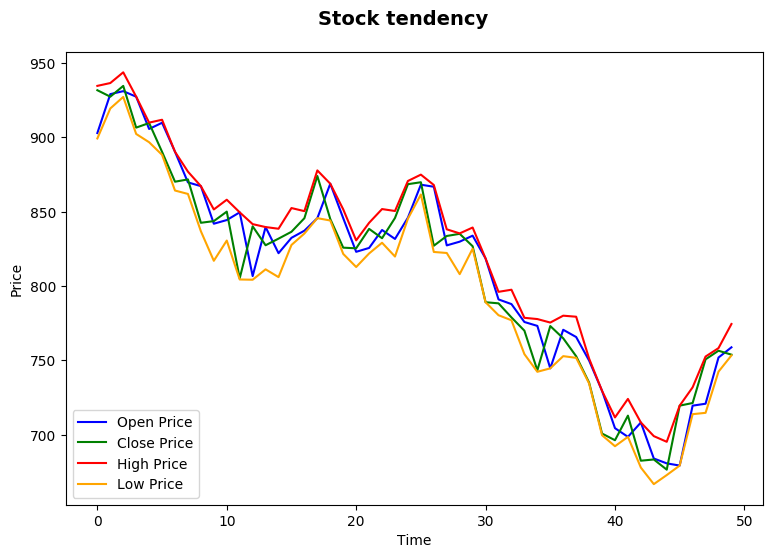

In [80]:
fig = plt.figure(figsize=(9,6),dpi=100)  
fig.suptitle('Stock tendency',y = 0.95, fontsize = 14, fontweight='bold')
ax = fig.add_subplot(1,1,1)
ax.plot(df['Open Price'][:50], color='b',label='Open Price')
ax.plot(df['Close Price'][:50], color='g', label='Close Price')
ax.plot(df['High Price'][:50], color='r', label='High Price' )
ax.plot(df['Low Price'][:50], color='orange', label='Low Price' )
ax.set_xlabel("Time")      
ax.set_ylabel("Price")
ax.legend(loc=3)

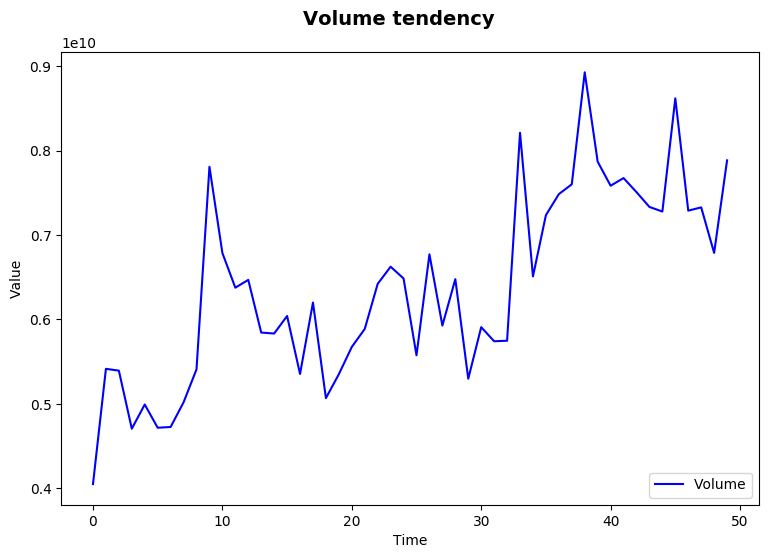

In [69]:
fig = plt.figure(figsize=(9,6),dpi=100)  
fig.suptitle('Volume tendency',y = 0.95, fontsize = 14, fontweight='bold')
ax = fig.add_subplot(1,1,1)
ax.plot(df['Volume'][:50], color='b',label='Volume')
ax.set_xlabel("Time")      
ax.set_ylabel("Value")
ax.legend(loc=4)

# Logistic Regression
- 增加一個 column 來表示明天是漲或是跌

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
df_ = df.drop('Date',axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_.drop(['Up'],axis=1), 
                                                    df_['Up'], test_size=0.30)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [7]:
from sklearn.metrics import classification_report
from sklearn import metrics

## Evaluate
- 用最基本的方法直接做發現 Logistic regression 的 model always predict 1

In [201]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       307
           1       0.55      1.00      0.71       372

   micro avg       0.55      0.55      0.55       679
   macro avg       0.27      0.50      0.35       679
weighted avg       0.30      0.55      0.39       679



In [53]:
metrics.accuracy_score(y_test,predictions)

0.5552282768777614

- 嘗試看看有沒有方法讓 model 開始 predict 0
- 發現把 training data 中的 column **Volumn** drop 掉後開始會 predict 0 但次數仍然很少

In [207]:
X_train, X_test, y_train, y_test = train_test_split(df_.drop(['Up','Volume'],axis=1), 
                                                    df_['Up'], test_size=0.30)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print("Total number of 0:",len(predictions[predictions == 0]))

              precision    recall  f1-score   support

           0       0.43      0.13      0.20       305
           1       0.55      0.86      0.67       374

   micro avg       0.53      0.53      0.53       679
   macro avg       0.49      0.50      0.44       679
weighted avg       0.50      0.53      0.46       679

Total number of 0: 92


# SVM

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_.drop(['Up','Date'],axis=1), 
                                                    df_['Up'], test_size=0.30)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [59]:
from sklearn.svm import SVC

In [65]:
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Evaluate

In [66]:
predictions = svm.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       295
           1       0.56      1.00      0.72       382

   micro avg       0.56      0.56      0.56       677
   macro avg       0.28      0.50      0.36       677
weighted avg       0.32      0.56      0.41       677



In [56]:
metrics.accuracy_score(y_test,predictions)

0.5493372606774669

把 Volume drop 掉
- 只有很少的情況下會預測 0 

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_.drop(['Up','Volume'],axis=1), 
                                                    df_['Up'], test_size=0.30)
svm.fit(X_train,y_train)
predictions_svm = svm.predict(X_test)
print(classification_report(y_test,predictions_svm))
print(metrics.accuracy_score(y_test,predictions_svm))
print("Total number of 0:",len(predictions_svm[predictions_svm == 0]))

              precision    recall  f1-score   support

           0       0.52      0.04      0.08       306
           1       0.55      0.97      0.70       373

   micro avg       0.55      0.55      0.55       679
   macro avg       0.54      0.51      0.39       679
weighted avg       0.54      0.55      0.42       679

0.5508100147275405
Total number of 0: 25


# Neural Network

In [70]:
from keras import models, layers, optimizers, regularizers
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_.drop(['Up'],axis=1), 
                                                    df_['Up'], test_size=0.30)

In [59]:
X_train.head()

,Open Price,Close Price,High Price,Low Price,Volume
579,1319.12,1330.36,1332.66,1319.12,3550103040
750,1243.72,1254.00,1255.22,1243.72,2695881984
334,1188.58,1202.26,1205.13,1188.58,4938050048
101,907.02,919.14,920.02,903.56,6050420224
126,894.27,898.72,898.72,886.36,4712580096


In [13]:
# create model
model = models.Sequential()
model.add(layers.Dense(60, input_dim=len(X_train.columns), kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                360       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [15]:
result = model.fit(X_train, y_train,
                      batch_size=32,
                      epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1584/1584 [==============================] - 0s 150us/step - loss: 8.6391 - acc: 0.4640
Epoch 2/5
1584/1584 [==============================] - 0s 28us/step - loss: 8.6391 - acc: 0.4640
Epoch 3/5
1584/1584 [==============================] - 0s 30us/step - loss: 8.6391 - acc: 0.4640
Epoch 4/5
1584/1584 [==============================] - 0s 28us/step - loss: 8.6391 - acc: 0.4640
Epoch 5/5
1584/1584 [==============================] - 0s 28us/step - loss: 8.6391 - acc: 0.4640


## Evaluate

In [22]:
pred = model.predict_classes(X_test)
pred = pred.reshape(len(pred),)
print(metrics.accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print("Accuracy",metrics.accuracy_score(y_test,pred))

0.5670103092783505
              precision    recall  f1-score   support

           0       0.49      0.16      0.24       292
           1       0.58      0.88      0.70       387

   micro avg       0.57      0.57      0.57       679
   macro avg       0.53      0.52      0.47       679
weighted avg       0.54      0.57      0.50       679

Accuracy 0.5670103092783505


In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_.drop(['Up','Volume'],axis=1), 
                                                    df_['Up'], test_size=0.30)

# create model
model = models.Sequential()
model.add(layers.Dense(60, input_dim=len(X_train.columns), kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

result = model.fit(X_train, y_train, batch_size=32, epochs=5)

predictions_NN = model.predict_classes(X_test)
predictions_NN = predictions_NN.reshape(len(predictions_NN),)
print(classification_report(y_test,predictions_NN))
print(metrics.accuracy_score(y_test,predictions_NN))
print("Total number of 0:",len(predictions_NN[predictions_NN == 0]))

Epoch 1/5
1584/1584 [==============================] - 0s 272us/step - loss: 8.6461 - acc: 0.4476
Epoch 2/5
1584/1584 [==============================] - 0s 31us/step - loss: 1.1289 - acc: 0.4874
Epoch 3/5
1584/1584 [==============================] - 0s 31us/step - loss: 0.7867 - acc: 0.5101
Epoch 4/5
1584/1584 [==============================] - 0s 31us/step - loss: 0.8015 - acc: 0.5234
Epoch 5/5
1584/1584 [==============================] - 0s 29us/step - loss: 0.9461 - acc: 0.5177
              precision    recall  f1-score   support

           0       0.46      0.99      0.63       314
           1       0.56      0.01      0.03       365

   micro avg       0.46      0.46      0.46       679
   macro avg       0.51      0.50      0.33       679
weighted avg       0.51      0.46      0.31       679

0.4639175257731959
Total number of 0: 670


## 發現一些有趣的事
當沒有把 Answer column 從 X_train drop 掉時可以看到 model 可以漸漸提昇準確度

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_.drop(['Date','Volume','Open Price',
                                                    'Close Price','Low Price','High Price'],
                                                    axis=1), df_['Up'], test_size=0.30)
# create model
model = models.Sequential()
model.add(layers.Dense(60, input_dim=len(X_train.columns), kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

result = model.fit(X_train, y_train, batch_size=32, epochs=10)

predictions_NN = model.predict_classes(X_test)
predictions_NN = predictions_NN.reshape(len(predictions_NN),)
print(classification_report(y_test,predictions_NN))
print(metrics.accuracy_score(y_test,predictions_NN))
print("Total number of 0:",len(predictions_NN[predictions_NN == 0]))

Epoch 1/10
1577/1577 [==============================] - 1s 440us/step - loss: 0.6975 - acc: 0.5314
Epoch 2/10
1577/1577 [==============================] - 0s 35us/step - loss: 0.6800 - acc: 0.5707
Epoch 3/10
1577/1577 [==============================] - 0s 34us/step - loss: 0.6543 - acc: 0.6189
Epoch 4/10
1577/1577 [==============================] - 0s 31us/step - loss: 0.6257 - acc: 0.6481
Epoch 5/10
1577/1577 [==============================] - 0s 30us/step - loss: 0.5815 - acc: 0.7698
Epoch 6/10
1577/1577 [==============================] - 0s 31us/step - loss: 0.5351 - acc: 0.8212
Epoch 7/10
1577/1577 [==============================] - 0s 35us/step - loss: 0.4657 - acc: 0.9651
Epoch 8/10
1577/1577 [==============================] - 0s 34us/step - loss: 0.4152 - acc: 0.9296
Epoch 9/10
1577/1577 [==============================] - 0s 33us/step - loss: 0.3279 - acc: 1.0000
Epoch 10/10
1577/1577 [==============================] - 0s 31us/step - loss: 0.2855 - acc: 0.9956
              prec

# Compare each method
## 1. Using the baseline model
### Accuracy
- **Logistic regression**:0.5552282768777614
- **SVM**:0.5316642120765832
- **Neural Network**:0.5331369661266568

### Discussion
所有的 model 都只會預測 1 (Neuron Network 偶爾會猜 0)，所以 Accuracy 完全沒有參考價值，只是剛好比較多結果是 1 的被分在 testing data ， 因為目前每個 model 結果都很爛，因此我打算先想辦法讓他們都可以開始猜 0

## 2. Try something to optimize
* drop **Volumn** column
    * some models **start to predict 0** but only very few time
    * Neuron Network sometime all predict 1 but sometime all predict 0. Other situations predict really random amoung 0 and 1
    * 意外發現當沒丟掉 Answer column 時，Neuron Network 是可以漸漸學到東西的，因此推論我們需要更多有用的 data 當作 input
    * 結果在上面
    
## 3. Change data input
* 希望新增一些有用的資料來當作 input
* 新增 K,D 值來當作股票預測的指標
* 新增一個欄位紀錄昨天是漲還是跌
* 打算先想辦法讓其中一種方法的準確率上升

In [12]:
def RSV(closePrice):
    result = []
    for i in range(len(closePrice[8:])):
        PriceMin = min(closePrice[i],closePrice[i+1],closePrice[i+2],closePrice[i+3],
        closePrice[i+4],closePrice[i+5],closePrice[i+6],closePrice[i+7],closePrice[i+8])
        
        PriceMax = max(closePrice[i],closePrice[i+1],closePrice[i+2],closePrice[i+3],
        closePrice[i+4],closePrice[i+5],closePrice[i+6],closePrice[i+7],closePrice[i+8])
        
        rsv = 100 * ((closePrice[i+8] - PriceMin) / (PriceMax - PriceMin))
        result.append(rsv)
    return result
def K(rsv):
    K = [50]
    K_lastday = 50
    K_today = 0
    ThirdTwo = 2/3
    ThirdOne = 1/3
    for i in range(1,len(rsv)):
        K_today = K_lastday * ThirdTwo + rsv[i] * ThirdOne
        K.append(K_today)
        K_lastday = K_today
    return K
def D(k):
    D = [50]
    D_lastday = 50
    D_today = 0
    ThirdTwo = 2/3
    ThirdOne = 1/3
    for i in range(1,(len(k))):
        D_today = D_lastday * ThirdTwo + k[i] * ThirdOne
        D.append(D_today)
        D_lastday = D_today
    return D

def Yesterday(up):
    yesterdayList = []
    for i in range(len(up) - 1):
        yesterdayList.append(up[i])
    return yesterdayList

def OpenClose(x):
    if x[0] > x[1]:
        return 1
    else:
        return 0

In [47]:
a = RSV(df['Close Price'])
df_ = df[8:]
df_['RSV'] = a
df_ = df_.reset_index(drop=True)
df_['K'] = K(df_['RSV'])
df_['D'] = D(df_['K'])
c = Yesterday(df_['Up'])
df_ = df_[1:]
df_["Yesterday Up"] = c
df_ = df_.reset_index(drop=True)
df_.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Up,RSV,K,D,Yesterday Up
0,15-Jan-2009,841.99,843.74,851.59,817.04,7807350272,1,1.216334,33.738778,44.579593,1
1,16-Jan-2009,844.45,850.12,858.13,830.66,6786039808,0,8.145091,25.207549,38.122245,1
2,20-Jan-2009,849.64,805.22,849.64,804.47,6375229952,1,0.000000,16.805033,31.016507,0
3,21-Jan-2009,806.77,840.24,841.72,804.30,6467829760,0,33.508755,22.372940,28.135318,1
4,22-Jan-2009,839.74,827.50,839.74,811.29,5843829760,1,26.171737,23.639206,26.636614,0


In [22]:
df_['Open vs Close'] = df_[['Open Price','Close Price']].apply(OpenClose, axis=1)

In [23]:
df_.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Up,RSV,K,D,Yesterday Up,Open vs Close
0,15-Jan-2009,841.99,843.74,851.59,817.04,7807350272,1,1.216334,33.738778,44.579593,1,0
1,16-Jan-2009,844.45,850.12,858.13,830.66,6786039808,0,8.145091,25.207549,38.122245,1,0
2,20-Jan-2009,849.64,805.22,849.64,804.47,6375229952,1,0.000000,16.805033,31.016507,0,1
3,21-Jan-2009,806.77,840.24,841.72,804.30,6467829760,0,33.508755,22.372940,28.135318,1,0
4,22-Jan-2009,839.74,827.50,839.74,811.29,5843829760,1,26.171737,23.639206,26.636614,0,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    df_.drop(['Date','Up','High Price','Low Price','RSV','Volume','Open vs Close'],axis=1), 
    df_['Up'], test_size=0.30)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

**看到下面的結果我直接心態炸裂，我覺得根本是 dataset 的問題吧，不然就是我對股票的知識太少才會無法改進**

In [25]:
print(classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))
print("Total number of 0:",len(predictions[predictions == 0]))

              precision    recall  f1-score   support

           0       0.39      0.15      0.22       282
           1       0.58      0.83      0.68       395

   micro avg       0.55      0.55      0.55       677
   macro avg       0.49      0.49      0.45       677
weighted avg       0.50      0.55      0.49       677

0.5494830132939439
Total number of 0: 109


# 4. 換方向
- 先利用 linear regression 的 model 來預測明天的收盤價
- 然後利用預測的明天收盤價來和今天的收盤價相比，如果較高則設 Pred Up 為 1，反之為 0，想說如果 Pred Up 可以跟 Up 很接近的話應該結果會不錯

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression(normalize=True)

In [41]:
def TomorrowPrice(Price):
    Tomorrow = []
    for i in range(len(Price) - 1):
        Tomorrow.append(Price[i+1])
    return Tomorrow

In [42]:
t = TomorrowPrice(df['Close Price'])

In [43]:
df_cool = df[:-1]
df_cool['Tomorrow Close'] = t

In [44]:
X = df_cool.drop(['Date','Tomorrow Close','Up'],axis=1)
y = df_cool['Tomorrow Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
X_train.head()

,Open Price,Close Price,High Price,Low Price,Volume
812,1392.78,1397.11,1399.18,1386.87,2587079936
373,1077.50,1074.57,1082.60,1071.45,3412819968
1798,1931.87,1951.70,1951.83,1925.41,2273025280
1862,2091.44,2090.10,2094.30,2087.08,1884462592
2020,2268.60,2275.32,2275.32,2260.83,2110331776


### 畫出預測結果，自我感覺良好中

Text(0, 0.5, 'predicted y')

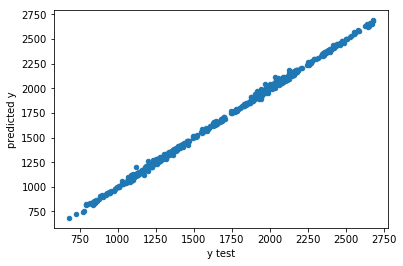

In [45]:
lm.fit(X_train,y_train)
prediction = lm.predict(X_test)
plt.scatter(y_test,prediction, s = 20)
plt.xlabel('y test')
plt.ylabel('predicted y')

In [50]:
X_test = df_.drop(['Date','RSV','K','D','Yesterday Up','Up'],axis=1)
X_test.head()

,Open Price,Close Price,High Price,Low Price,Volume
0,841.99,843.74,851.59,817.04,7807350272
1,844.45,850.12,858.13,830.66,6786039808
2,849.64,805.22,849.64,804.47,6375229952
3,806.77,840.24,841.72,804.30,6467829760
4,839.74,827.50,839.74,811.29,5843829760


In [51]:
pred_tomorrow = lm.predict(X_test)

In [52]:
df_['Tomorrow Pred'] = pred_tomorrow

In [53]:
df_.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Up,RSV,K,D,Yesterday Up,Tomorrow Pred
0,15-Jan-2009,841.99,843.74,851.59,817.04,7807350272,1,1.216334,33.738778,44.579593,1,842.167944
1,16-Jan-2009,844.45,850.12,858.13,830.66,6786039808,0,8.145091,25.207549,38.122245,1,850.133087
2,20-Jan-2009,849.64,805.22,849.64,804.47,6375229952,1,0.000000,16.805033,31.016507,0,808.631145
3,21-Jan-2009,806.77,840.24,841.72,804.30,6467829760,0,33.508755,22.372940,28.135318,1,840.492468
4,22-Jan-2009,839.74,827.50,839.74,811.29,5843829760,1,26.171737,23.639206,26.636614,0,826.765328


In [54]:
def BigSmall(x):
    if x[1] > x[0]:
        return 1
    else:
        return 0

In [55]:
df_['Pred Up'] = df_[['Close Price','Tomorrow Pred']].apply(BigSmall, axis=1)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    df_.drop(['Date','Up','High Price','Low Price','RSV','Volume'],axis=1), 
    df_['Up'], test_size=0.30)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

## 登愣！結果出爐
- 說真的我剛剛真的以為會有好結果的，但我還是太天真了，心態再次炸裂！！！！
- 總而言之我就是個對股票完全不了解的低能兒

### Logistic Regression

In [179]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.09      0.15       304
           1       0.56      0.94      0.70       373

   micro avg       0.56      0.56      0.56       677
   macro avg       0.54      0.51      0.43       677
weighted avg       0.54      0.56      0.45       677



### SVM

In [68]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

svm = SVC()
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.02      0.04       301
           1       0.56      0.98      0.71       376

   micro avg       0.56      0.56      0.56       677
   macro avg       0.53      0.50      0.37       677
weighted avg       0.53      0.56      0.41       677



### NN

In [71]:
# create model
model = models.Sequential()
model.add(layers.Dense(60, input_dim=len(X_train.columns), kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

result = model.fit(X_train, y_train, batch_size=32, epochs=10)

predictions_NN = model.predict_classes(X_test)
predictions_NN = predictions_NN.reshape(len(predictions_NN),)
print(classification_report(y_test,predictions_NN))
print(metrics.accuracy_score(y_test,predictions_NN))
print("Total number of 0:",len(predictions_NN[predictions_NN == 0]))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1577/1577 [==============================] - 0s 149us/step - loss: 3.7764 - acc: 0.4826
Epoch 2/10
1577/1577 [==============================] - 0s 30us/step - loss: 0.7191 - acc: 0.5225
Epoch 3/10
1577/1577 [==============================] - 0s 30us/step - loss: 0.7530 - acc: 0.5212
Epoch 4/10
1577/1577 [==============================] - 0s 28us/step - loss: 0.7402 - acc: 0.5219
Epoch 5/10
1577/1577 [==============================] - 0s 29us/step - loss: 0.7556 - acc: 0.5111
Epoch 6/10
1577/1577 [==============================] - 0s 27us/step - loss: 0.7663 - acc: 0.5162
Epoch 7/10
1577/1577 [==============================] - 0s 29us/step - loss: 0.7670 - acc: 0.5073
Epoch 8/10
1577/1577 [==============================] - 0s 27us/step - loss: 0.7232 - acc: 0.5149
Epoch 9/10
1577/1577 [==============================] - 0s 27us/step - loss: 0.7331 - acc: 0.51

# 5. 總結
- 我還真的分不出來哪個 model 比較好，試過很多方法但還是找不到讓 model 明顯變好的方法